# Exploratory Data Analysis

## Imports

In [228]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from library.sb_utils import save_file

pd.options.display.max_rows = 10

## 1. Load The Data

In [229]:
patient = pd.read_csv('../data/Patient_data_cleaned.csv')

In [230]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83249 entries, 0 to 83248
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    83249 non-null  int64  
 1   age                            83249 non-null  float64
 2   bmi                            83249 non-null  float64
 3   elective_surgery               83249 non-null  int64  
 4   ethnicity                      83249 non-null  object 
 5   gender                         83249 non-null  object 
 6   height                         83249 non-null  float64
 7   icu_admit_source               83249 non-null  object 
 8   icu_stay_type                  83249 non-null  object 
 9   icu_type                       83249 non-null  object 
 10  pre_icu_los_days               83249 non-null  float64
 11  weight                         83249 non-null  float64
 12  apache_2_diagnosis             83249 non-null 

In [231]:
patient.head(3)

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,AgeGroup
0,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,admit,CTICU,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,60-80
1,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,60-80
2,118,25.0,31.952749,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,20-40


## 2. Data Spliting

### 2.1 Numerical data

In [232]:
##Selecting numerical features
numerical_data = patient.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 74 numerical features: 

['hospital_id', 'age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvas

### 2.2 Categorical data

In [233]:
#Selecting categoricalfeatures
categorical_data=patient.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 8 numerical features: 

['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'AgeGroup']


## 3. Descriptive Analysis

### 3.1 Summary statistics of Numerical Features

#### 3.1.1 Glance of the statistics

In [234]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_id,83249.0,106.456522,62.673166,2.000000,50.000000,112.000000,166.00000,204.00000
age,83249.0,62.325172,16.478417,16.000000,53.000000,64.000000,75.00000,89.00000
bmi,83249.0,29.105340,8.012283,10.738543,23.738117,27.727833,32.75494,98.81087
elective_surgery,83249.0,0.181864,0.385735,0.000000,0.000000,0.000000,0.00000,1.00000
height,83249.0,169.633239,10.760590,137.200000,162.500000,170.100000,177.80000,195.59000
...,...,...,...,...,...,...,...,...
immunosuppression,83249.0,0.026307,0.160047,0.000000,0.000000,0.000000,0.00000,1.00000
leukemia,83249.0,0.006967,0.083178,0.000000,0.000000,0.000000,0.00000,1.00000
lymphoma,83249.0,0.004132,0.064149,0.000000,0.000000,0.000000,0.00000,1.00000
solid_tumor_with_metastasis,83249.0,0.020709,0.142409,0.000000,0.000000,0.000000,0.00000,1.00000


#### 3.1.2 Check the unique value counts of each feature

In [235]:
numerical_data.nunique()

hospital_id                      147
age                               75
bmi                            33583
elective_surgery                   2
height                           393
                               ...  
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
hospital_death                     2
Length: 74, dtype: int64

Although all the data is numerical but from the unique value of each features we can easily infer that a lot of the numerical features actually are categorical data.Some of them are binary variables, including our target variable: hospital_death.

#### 3.1.3 Skew in numerical features

In [236]:
numerical_data.skew()

hospital_id                    -0.071197
age                            -0.640337
bmi                             1.407711
elective_surgery                1.649546
height                         -0.101055
                                 ...    
immunosuppression               5.919588
leukemia                       11.855161
lymphoma                       15.460132
solid_tumor_with_metastasis     6.731349
hospital_death                  3.056552
Length: 74, dtype: float64

Although I already omitted the outlier, there are some features that are still supper skewed. Such as the gcs_unable_apache, aids, hepatic_failure, immunosuppression, leukemia , lymphoma, cirrhosis , solid_tumor_with_metastasis , arf_apache etc. But most of these skewed features are categorical features. The continuous variables are not that skewed which is good.

#### 3.1.4 Distributions of numerical features

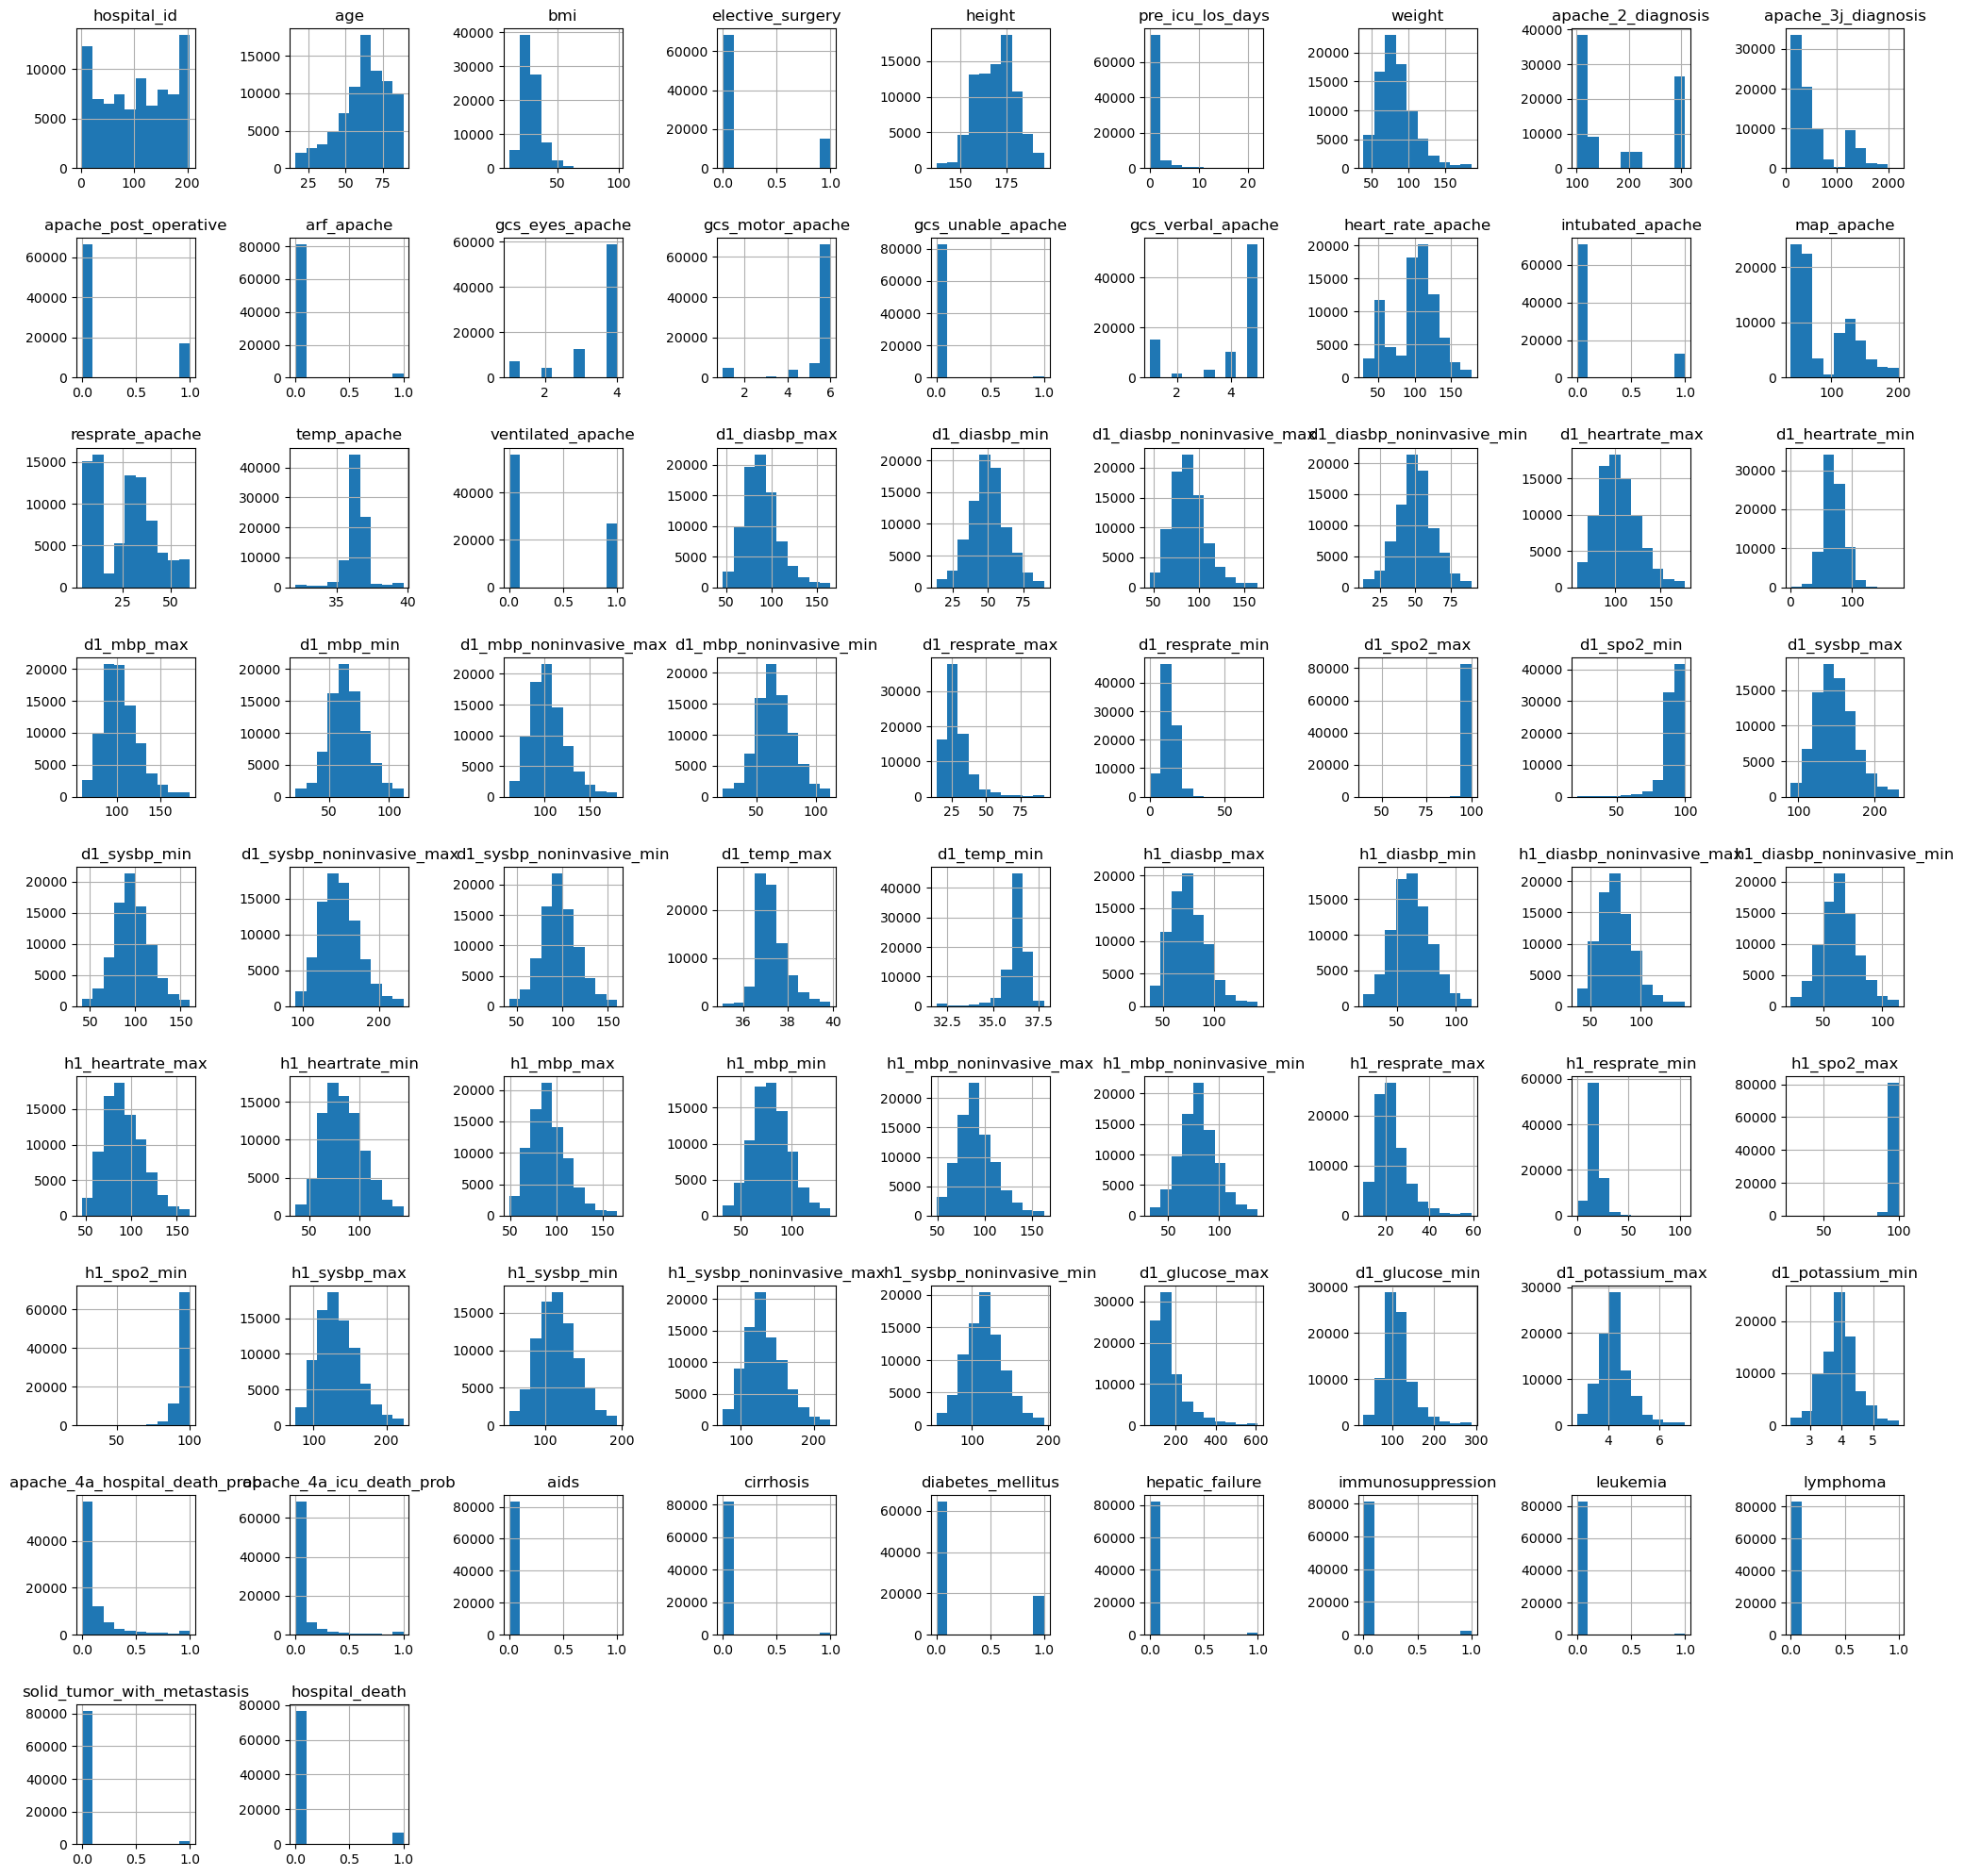

In [237]:
numerical_data.hist(figsize=(25,25))
plt.subplots_adjust(wspace=0.8,hspace=0.5);

#### 3.1.5 Density plots of numerical features

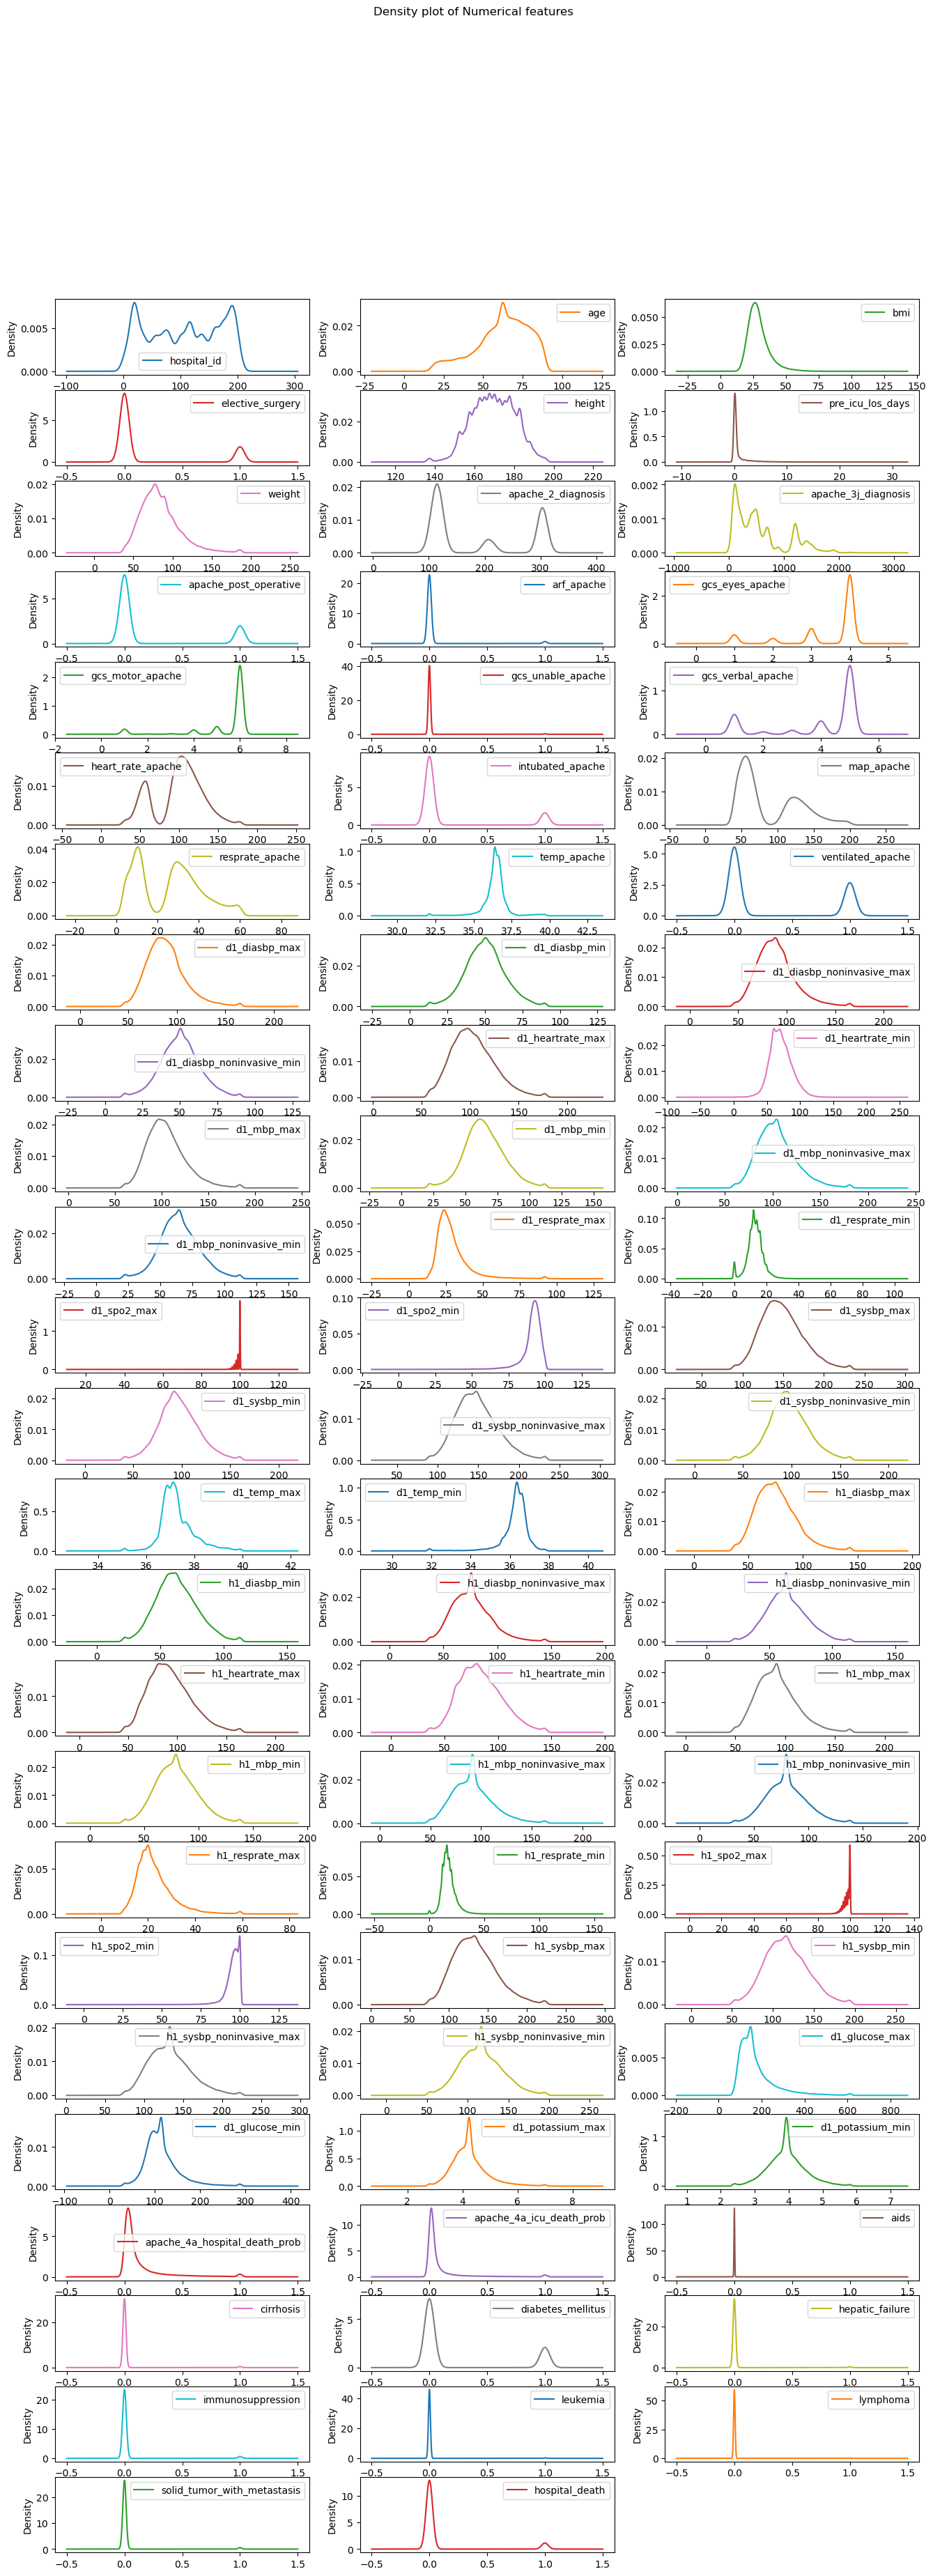

In [238]:
numerical_data.plot(kind='density',figsize=(16,42),subplots=True,layout=(25,3),title="Density plot of Numerical features",sharex=False)
plt.show()

Most of the continuous variables are approximately normal distributed which is good.

#### 3.1.6 Variance of each numerical features

In [239]:
numerical_data.var()

hospital_id                    3927.925799
age                             271.538215
bmi                              64.196685
elective_surgery                  0.148791
height                          115.790300
                                  ...     
immunosuppression                 0.025615
leukemia                          0.006919
lymphoma                          0.004115
solid_tumor_with_metastasis       0.020280
hospital_death                    0.074951
Length: 74, dtype: float64

Some of the data have high variance which means they may lead overfitting of models. Models with high variance may fit the training data very well but fail to perform well on new, unseen data due to their inability to generalize beyond the specific training set. So I need to normalize the data before build the model. The variance of 'aids','leukemia' and 'lymphoma' are relatively low, and they are the most skwed variables, so we might need to drop these columns. Let's look into these three features to decide whether to drop them or keep them.

#### 3.1.7  Check features that have low variance and are most skwed

Correlation between features and target variabel:

In [240]:
df=numerical_data[['aids','leukemia','lymphoma','hospital_death']]
correlation_matrix = df.corr()
correlation_matrix

,aids,leukemia,lymphoma,hospital_death
aids,1.000000,-0.002447,0.023777,0.006321
leukemia,-0.002447,1.000000,0.032876,0.027782
lymphoma,0.023777,0.032876,1.000000,0.019101
hospital_death,0.006321,0.027782,0.019101,1.000000


All these features have low correlation with our target variable.

Let's check the deathrate by features to see if there are difference.

In [241]:
#Define the function:
def deathrate(col_name,data=patient):
    death_by_col= data[data.hospital_death==1][col_name].value_counts()
    deathrate_by_col = death_by_col/data[col_name].value_counts()
    return deathrate_by_col

Deathrate by aids:

In [242]:
df.aids.value_counts()

0.0    83178
1.0       71
Name: aids, dtype: int64

In [243]:
deathrate('aids',numerical_data)

0.0    0.081560
1.0    0.140845
Name: aids, dtype: float64

death_by_leukemia：

In [244]:
df.leukemia.value_counts()

0.0    82669
1.0      580
Name: leukemia, dtype: int64

In [245]:
deathrate('leukemia',numerical_data)

0.0    0.080974
1.0    0.172414
Name: leukemia, dtype: float64

death_by_lymphoma：

In [246]:
df.lymphoma.value_counts()

0.0    82905
1.0      344
Name: lymphoma, dtype: int64

In [247]:
deathrate('lymphoma',numerical_data)

0.0    0.081274
1.0    0.162791
Name: lymphoma, dtype: float64

We can see that althrough all these features have a low correlation with our target variable, but they do have big impact on the deathrate of the paitent. So we'd better to keep them in our model.

### 3.2 Summary statistics of Categorical Features

#### 3.2.1 Glance of the statistics of the Categorical Features

In [248]:
categorical_data.describe(include='object').T

,count,unique,top,freq
ethnicity,83249,6,Caucasian,65345
gender,83249,2,M,44979
icu_admit_source,83249,5,Accident & Emergency,49801
icu_stay_type,83249,3,admit,78363
icu_type,83249,8,Med-Surg ICU,45659
apache_3j_bodysystem,83249,11,Cardiovascular,27343
apache_2_bodysystem,83249,9,Cardiovascular,35712
AgeGroup,83249,5,60-80,39295


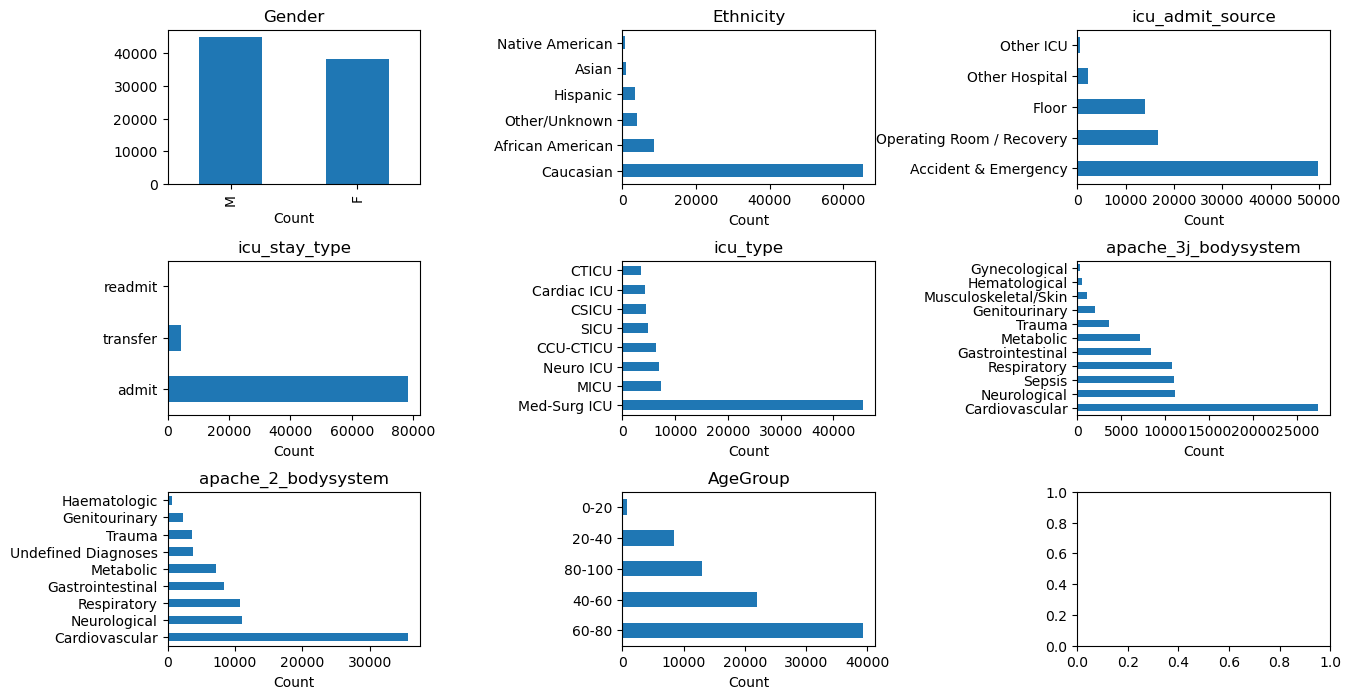

In [249]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

#Gender
categorical_data.gender.value_counts().plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('Gender')
ax[0,0].set_xlabel('Count')
#Ethnicity
categorical_data.ethnicity.value_counts().plot(kind='barh', ax=ax[0,1])
ax[0,1].set_title('Ethnicity')
ax[0,1].set_xlabel('Count')
#icu_admit_source
categorical_data.icu_admit_source.value_counts().plot(kind='barh', ax=ax[0,2])
ax[0,2].set_title('icu_admit_source')
ax[0,2].set_xlabel('Count')
#icu_stay_type
categorical_data.icu_stay_type.value_counts().plot(kind='barh', ax=ax[1,0])
ax[1,0].set_title('icu_stay_type')
ax[1,0].set_xlabel('Count')
#icu_type
categorical_data.icu_type.value_counts().plot(kind='barh', ax=ax[1,1])
ax[1,1].set_title('icu_type')
ax[1,1].set_xlabel('Count')

categorical_data.apache_3j_bodysystem.value_counts().plot(kind='barh', ax=ax[1,2])
ax[1,2].set_title('apache_3j_bodysystem')
ax[1,2].set_xlabel('Count')

categorical_data.apache_2_bodysystem.value_counts().plot(kind='barh', ax=ax[2,0])
ax[2,0].set_title('apache_2_bodysystem')
ax[2,0].set_xlabel('Count')

categorical_data.AgeGroup.value_counts().plot(kind='barh', ax=ax[2,1])
ax[2,1].set_title('AgeGroup')
ax[2,1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.8
plt.subplots_adjust(wspace=0.8,hspace=0.5)

#### 3.2.2 Categorical features VS. Target

In [250]:
import copy
df1=categorical_data.copy()
df1['hospital_death']=patient['hospital_death']

In [251]:
for col in categorical_data.columns:
    print(deathrate(col,df1))
    

African American    0.071504
Asian               0.078663
Caucasian           0.082608
Hispanic            0.093288
Native American     0.087483
Other/Unknown       0.076449
Name: ethnicity, dtype: float64
M    0.080193
F    0.083277
Name: gender, dtype: float64
Accident & Emergency         0.082348
Floor                        0.126211
Operating Room / Recovery    0.035044
Other Hospital               0.127397
Other ICU                    0.123616
Name: icu_admit_source, dtype: float64
admit       0.080944
transfer    0.092872
readmit     0.086560
Name: icu_stay_type, dtype: float64
CCU-CTICU       0.068901
CSICU           0.051429
CTICU           0.056032
Cardiac ICU     0.096475
MICU            0.114659
Med-Surg ICU    0.083248
Neuro ICU       0.078760
SICU            0.070016
Name: icu_type, dtype: float64
Cardiovascular          0.073840
Gastrointestinal        0.068891
Genitourinary           0.055528
Gynecological           0.006803
Hematological           0.079174
             

The apache_3j_bodysystem and apache_2_bodysystem share most of their values, so I only need to keep one of them, in this case I will choose to keep apache_3j_bodysystem, since it have a value 'Sepsis' that have the highest death rate.

In [252]:
categorical_data=categorical_data.drop('apache_2_bodysystem', axis=1)

## 4. Categorical data encoding

### 4.1 one hot encoding

In [253]:
cat_encoded = pd.get_dummies(categorical_data)

In [254]:
#merge the dataset
patient_onehot_encoded=pd.concat([numerical_data, cat_encoded], axis=1)
#move target to the last col
column_to_move = patient_onehot_encoded['hospital_death']
patient_onehot_encoded = patient_onehot_encoded.drop('hospital_death', axis=1)
patient_onehot_encoded['hospital_death'] = column_to_move
patient_onehot_encoded.head(3)

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,AgeGroup_0-20,AgeGroup_20-40,AgeGroup_40-60,AgeGroup_60-80,AgeGroup_80-100,hospital_death
0,118,68.0,22.732803,0,180.3,0.541667,73.9,113.0,502.01,0,...,0,0,1,0,0,0,0,1,0,0
1,81,77.0,27.421875,0,160.0,0.927778,70.2,108.0,203.01,0,...,0,1,0,0,0,0,0,1,0,0
2,118,25.0,31.952749,0,172.7,0.000694,95.3,122.0,703.03,0,...,0,0,0,0,0,1,0,0,0,0


### 4.2 Label encoding 

In [255]:
cat_label_encoded=categorical_data.copy()
from sklearn.preprocessing import LabelEncoder

columns_list= categorical_data.columns.tolist()
label_encoder = LabelEncoder()
# Apply label encoding to each column in the list
for column in columns_list:
    cat_label_encoded[column + '_encoded'] = label_encoder.fit_transform(categorical_data[column])
cat_label_encoded=cat_label_encoded.drop(columns_list,axis=1)

In [256]:
#merge the dataset
patient_label_encoded=pd.concat([numerical_data, cat_label_encoded], axis=1)
#move target to the last col
column_to_move = patient_label_encoded['hospital_death']
patient_label_encoded = patient_label_encoded.drop('hospital_death', axis=1)
patient_label_encoded['hospital_death'] = column_to_move
patient_label_encoded.head(3)

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_admit_source_encoded,icu_stay_type_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,AgeGroup_encoded,hospital_death
0,118,68.0,22.732803,0,180.3,0.541667,73.9,113.0,502.01,0,...,0.0,0.0,2,1,1,0,2,9,3,0
1,81,77.0,27.421875,0,160.0,0.927778,70.2,108.0,203.01,0,...,0.0,0.0,2,0,1,0,5,8,3,0
2,118,25.0,31.952749,0,172.7,0.000694,95.3,122.0,703.03,0,...,0.0,0.0,2,0,0,0,5,5,1,0


## 5. Correlation Analysis

### 5.1 Using onehot encoded data

In [257]:
# Generating correlation coefficient between each features using onehot encoded data
correlation=patient_onehot_encoded.corr(method='pearson')
correlation

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,AgeGroup_0-20,AgeGroup_20-40,AgeGroup_40-60,AgeGroup_60-80,AgeGroup_80-100,hospital_death
hospital_id,1.000000,-0.010654,0.015551,0.054030,0.029420,-0.001608,0.027475,0.009026,0.029112,0.053598,...,-0.036452,-0.022601,-0.011814,0.021204,0.000473,0.004627,0.003769,0.002414,-0.011867,-0.005279
age,-0.010654,1.000000,-0.082063,0.068365,-0.106777,0.069840,-0.121540,0.023323,-0.058036,0.057744,...,-0.007169,0.025039,0.053563,-0.084065,-0.247119,-0.650645,-0.392880,0.374287,0.563939,0.106231
bmi,0.015551,-0.082063,1.000000,0.016576,-0.050532,0.002855,0.890885,0.028417,-0.004853,0.018421,...,-0.027147,0.021555,-0.004611,-0.049675,-0.042607,-0.006348,0.112758,0.006824,-0.130602,-0.033494
elective_surgery,0.054030,0.068365,0.016576,1.000000,0.024205,0.168207,0.026124,0.368505,0.803422,0.927319,...,-0.031307,-0.066806,-0.183493,-0.033773,-0.021683,-0.065836,-0.023468,0.077579,-0.018315,-0.090497
height,0.029420,-0.106777,-0.050532,0.024205,1.000000,-0.013914,0.390973,-0.000361,0.014476,0.024341,...,-0.013409,-0.026936,-0.030834,0.042912,-0.005618,0.039626,0.088887,-0.026671,-0.102834,-0.019778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AgeGroup_20-40,0.004627,-0.650645,-0.006348,-0.065836,0.039626,-0.043976,0.010394,-0.040070,0.049813,-0.054101,...,0.004752,-0.024716,-0.035328,0.096001,-0.030770,1.000000,-0.199846,-0.315490,-0.143100,-0.058986
AgeGroup_40-60,0.003769,-0.392880,0.112758,-0.023468,0.088887,-0.036173,0.143836,0.013419,0.001433,-0.024075,...,0.015296,-0.003360,-0.024897,-0.015596,-0.055233,-0.199846,1.000000,-0.566304,-0.256864,-0.060789
AgeGroup_60-80,0.002414,0.374287,0.006824,0.077579,-0.026671,0.045906,-0.006781,0.039428,-0.002678,0.072119,...,-0.017830,0.023308,0.021112,-0.055173,-0.087194,-0.315490,-0.566304,1.000000,-0.405501,0.040000
AgeGroup_80-100,-0.011867,0.563939,-0.130602,-0.018315,-0.102834,0.023157,-0.163567,-0.030894,-0.045802,-0.021013,...,0.003598,-0.004788,0.035642,0.001584,-0.039549,-0.143100,-0.256864,-0.405501,1.000000,0.072255


### 5.2 Using label encoded data

In [258]:
# Generating correlation coefficient between each features using label encoded data
correlation=patient_label_encoded.corr(method='pearson')
correlation

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_admit_source_encoded,icu_stay_type_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,AgeGroup_encoded,hospital_death
hospital_id,1.000000,-0.010654,0.015551,0.054030,0.029420,-0.001608,0.027475,0.009026,0.029112,0.053598,...,0.002268,-0.004961,-0.011647,0.012085,0.008847,-0.004668,-0.079154,-0.046616,-0.010015,-0.005279
age,-0.010654,1.000000,-0.082063,0.068365,-0.106777,0.069840,-0.121540,0.023323,-0.058036,0.057744,...,0.022056,0.026515,0.023266,-0.025964,0.070510,-0.009326,-0.071734,-0.099444,0.943989,0.106231
bmi,0.015551,-0.082063,1.000000,0.016576,-0.050532,0.002855,0.890885,0.028417,-0.004853,0.018421,...,-0.009778,-0.041988,-0.023800,-0.044483,0.030747,0.000841,-0.027773,-0.043777,-0.092048,-0.033494
elective_surgery,0.054030,0.068365,0.016576,1.000000,0.024205,0.168207,0.026124,0.368505,0.803422,0.927319,...,-0.009011,0.017377,0.020879,0.031051,0.639919,-0.059456,-0.124161,-0.247263,0.055549,-0.090497
height,0.029420,-0.106777,-0.050532,0.024205,1.000000,-0.013914,0.390973,-0.000361,0.014476,0.024341,...,0.009547,0.005010,-0.069196,0.683817,0.010329,-0.001178,-0.029661,-0.028963,-0.111440,-0.019778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icu_stay_type_encoded,-0.004668,-0.009326,0.000841,-0.059456,-0.001178,0.018567,0.000826,-0.023121,-0.034027,-0.059819,...,0.002240,-0.002279,-0.013561,-0.011968,-0.006543,1.000000,0.013408,0.063094,-0.008264,0.009883
icu_type_encoded,-0.079154,-0.071734,-0.027773,-0.124161,-0.029661,-0.023092,-0.038947,-0.012187,0.040128,-0.102134,...,0.001076,0.016975,0.013629,-0.047577,-0.098637,0.013408,1.000000,0.296533,-0.065363,0.017137
apache_3j_bodysystem_encoded,-0.046616,-0.099444,-0.043777,-0.247263,-0.028963,-0.051465,-0.054504,-0.201200,0.025363,-0.249432,...,0.016669,0.042976,0.001827,-0.057053,-0.189155,0.063094,0.296533,1.000000,-0.088671,0.058568
AgeGroup_encoded,-0.010015,0.943989,-0.092048,0.055549,-0.111440,0.064605,-0.132379,0.015905,-0.061155,0.045274,...,0.017975,0.018609,0.022452,-0.030879,0.059298,-0.008264,-0.065363,-0.088671,1.000000,0.105356


We can see that there are some features that have a very low correlation with our target variable. But some of the features are discontinuous data, so the pearson correlation might not be a good way to determine whether we should keep or drop the feature. 

## 6. Save data

In [270]:
# save the data to a new csv file
datapath = '../data'
save_file(patient_onehot_encoded, 'patient_onehot_encoded.csv', datapath)
save_file(patient_label_encoded, 'patient_label_encoded.csv', datapath)

Writing file.  "../data/patient_onehot_encoded.csv"
Writing file.  "../data/patient_label_encoded.csv"


## 7. Summary

I have done some statistic for the numerical data and categorical data separately. Then to get the data prepared for modeling in the next step, I use both one hot encoding and label encoding to encode all the categorical features into numerical data. Also, I investigated the relation between all the feature and my target variable. 

For now, I only dropped one feature which is apache_2_bodysystem, because it is redundant and there is a better feature contains all apache_2_bodysystem’s information.

I kept all other features for now, not indicating that all these features are useful. I will do different features selection when using different models accordingly. And I believe it’s more reasonable to do so.
